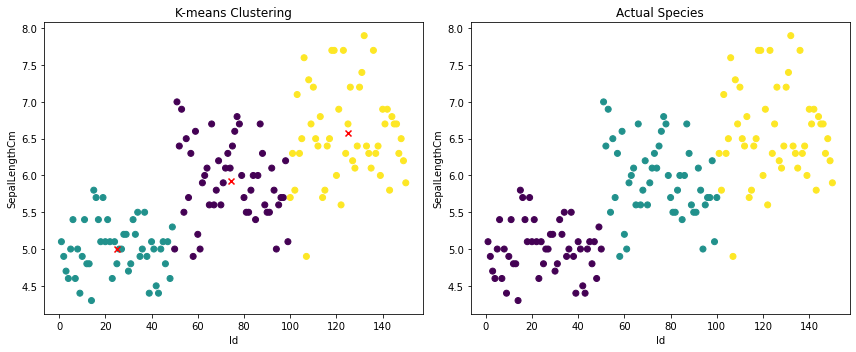

            Species  Cluster
0       Iris-setosa        1
1       Iris-setosa        1
2       Iris-setosa        1
3       Iris-setosa        1
4       Iris-setosa        1
..              ...      ...
145  Iris-virginica        2
146  Iris-virginica        2
147  Iris-virginica        2
148  Iris-virginica        2
149  Iris-virginica        2

[150 rows x 2 columns]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def kmeans_clustering(dataset, k=3, max_iterations=100):
    # Remove the Species column and store it separately
    species = dataset['Species']
    dataset = dataset.drop('Species', axis=1)
    
    # Convert the dataset to a NumPy array
    data = dataset.values
    
    # Initialize cluster centroids randomly
    np.random.seed(42)
    indices = np.random.choice(len(data), size=k, replace=False)
    centroids = data[indices]
    
    # Perform K-means clustering
    for _ in range(max_iterations):
        # Assign each data point to the nearest centroid
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        cluster_labels = np.argmin(distances, axis=0)
        
        # Update cluster centroids
        new_centroids = np.array([data[cluster_labels == i].mean(axis=0) for i in range(k)])
        
        # Check convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    # Plotting the clusters and actual species
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plotting the cluster assignments
    axes[0].scatter(data[:, 0], data[:, 1], c=cluster_labels)
    axes[0].scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
    axes[0].set_xlabel(dataset.columns[0])
    axes[0].set_ylabel(dataset.columns[1])
    axes[0].set_title("K-means Clustering")
    
    # Plotting the actual species
    species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    species_labels = [species_mapping[s] for s in species]
    axes[1].scatter(data[:, 0], data[:, 1], c=species_labels)
    axes[1].set_xlabel(dataset.columns[0])
    axes[1].set_ylabel(dataset.columns[1])
    axes[1].set_title("Actual Species")
    
    plt.tight_layout()
    plt.show()
    return cluster_labels

# Load the Iris dataset
iris_df = pd.read_csv('Iris Dataset.csv')

# Apply K-means clustering and get cluster labels
cluster_labels = kmeans_clustering(iris_df)

# Add cluster labels to the DataFrame
iris_df['Cluster'] = cluster_labels

# Display the predictions
print(iris_df[['Species', 'Cluster']])